In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Diwali-Sales-Data.csv",encoding = 'ISO-8859-1')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


Here's a brief description of each column in the data set:

1. **User_ID**: Unique identifier for each customer, used to differentiate individual buyers.

2. **Cust_name**: Name of the customer, providing a human-readable identifier and allowing for personalization in analysis.

3. **Product_ID**: Unique identifier for each product, used to track and analyze product-specific purchasing behavior.

4. **Gender**: Customer's gender, with potential values 'F' for Female and 'M' for Male, which can be used in demographic analysis.

5. **Age Group**: Age category of the customer, grouped in ranges like "0-17," "26-35," etc., allowing age-based segmentation and analysis.

6. **Age**: Exact age of the customer, offering more granular demographic data compared to age group.

7. **Marital_Status**: Marital status of the customer, with '0' representing Not Married and '1' representing Married, useful for segmentation based on family demographics.

8. **State**: The state in which the customer resides, providing geographical data for regional analysis.

9. **Zone**: The region or zone within India (for example, Southern, Western) where the state is located, used to group data by larger geographical areas.

10. **Occupation**: Type of occupation of the customer, such as Healthcare, Construction, etc., which can be valuable for profiling and segmentation based on profession.

11. **Product_Category**: General category of the product, like "Auto" or "Food Processing," allowing analysis of purchasing behavior by product type.

12. **Orders**: Number of units of a product ordered by the customer, indicating purchasing volume.

13. **Amount**: Total monetary amount spent on the orders, providing a basis for revenue and spending analysis.

14. **Status**: Status of the order (for example, completed, pending), which could provide insights into order fulfillment and customer experience, though values are currently missing in this sample.

15. **Unnamed1**: Likely an extraneous or placeholder column without relevant data, possibly from a CSV import. It may need to be removed for clean data analysis.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


Key insights
This dataset shows a diverse age group with both budget and high-spending customers, moderate repeat purchases, and a nearly balanced split between married and unmarried customers. Great for segmenting customers by age and spending!

In [8]:
df["User_ID"].nunique()

3755

In [9]:
df["State"].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Madhya Pradesh',
       'Jharkhand', 'Kerala', 'Haryana', 'Bihar', 'Rajasthan',
       'Uttarakhand', 'Telangana', 'Punjab'], dtype=object)

In [10]:
df["State"].nunique()

16

In [11]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [12]:
#status and unnamded1 is almost null so drop the columns

In [13]:
df.drop(["Status","unnamed1"],axis = 1 , inplace = True)

In [14]:
#few null value in Amount so droping

In [15]:
df.dropna(inplace = True)

In [16]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [17]:
df.duplicated().sum()

8

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.duplicated().sum()

0

<Axes: xlabel='State'>

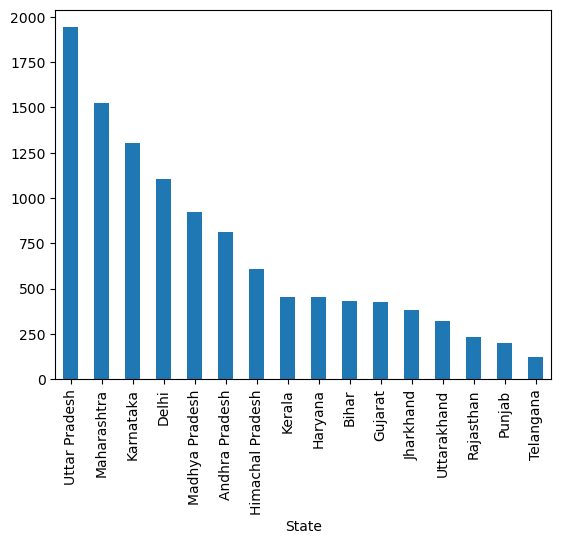

In [20]:
df['State'].value_counts().plot(kind = 'bar')

Insights from state distribution

**.** Uttar Pradesh leads with the highest entries (1944), followed by Maharashtra (1525) and Karnataka (1304), indicating strong market presence.

**.** Moderate counts in Delhi (1104) and Madhya Pradesh (921) suggest opportunities for growth.

**.** States like Telangana (125) and Punjab (200) have lower engagement, indicating potential areas for targeted marketing efforts.

**.** This distribution can guide resource allocation and marketing strategies to enhance customer engagement across regions.

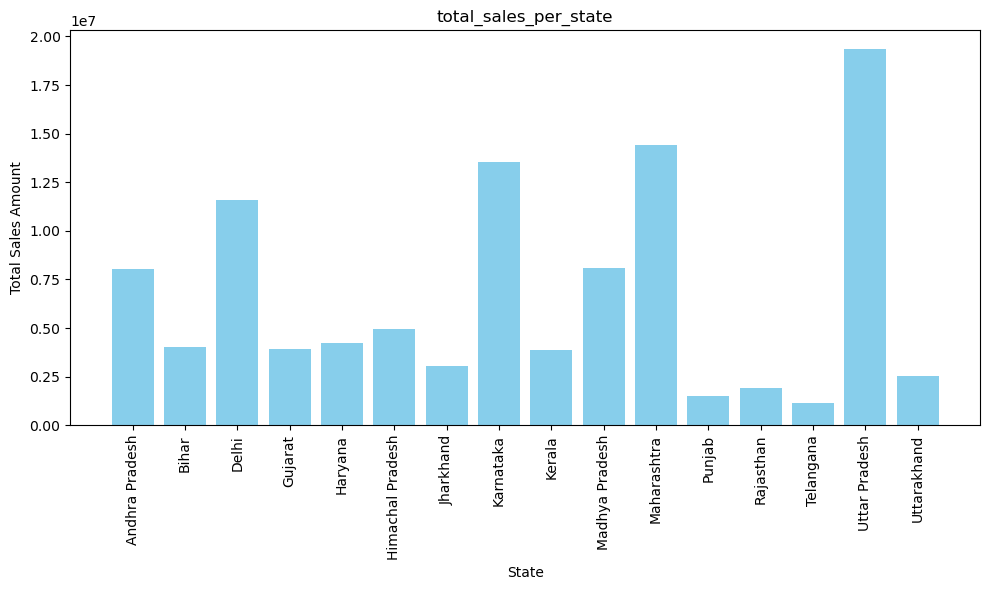

In [22]:
total_sales_per_state = df.groupby('State')["Amount"].sum().reset_index()
total_sales_per_state.columns = ["State","Total_sales"]

#Bar Chart for Total sales by state
plt.figure(figsize=(10,6))
plt.bar(total_sales_per_state["State"],total_sales_per_state["Total_sales"],color = 'skyblue')
plt.title("total_sales_per_state")
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation =  90)
plt.tight_layout()
plt.show()

***The output presents the total sales amounts for each state in the dataset. Here are some insights:***

**Highest Sales:** Uttar Pradesh has the highest total sales amount at approximately ₹19,374,968, indicating a strong market presence or customer engagement in that region.

**Second Highest:** Maharashtra follows closely with total sales of ₹14,427,543, also showcasing significant activity.

**Other Notable States:** Karnataka and Delhi also report high sales figures of ₹13,523,540 and ₹11,603,819.45, respectively, highlighting these states as key contributors to overall sales.

**Lower Sales States:** States like Punjab and Telangana show lower total sales amounts, with figures of ₹1,525,800 and ₹1,151,490, suggesting potential areas for growth or increased marketing efforts.

This information is valuable for identifying strong markets and those that may require more attention or strategy adjustments.

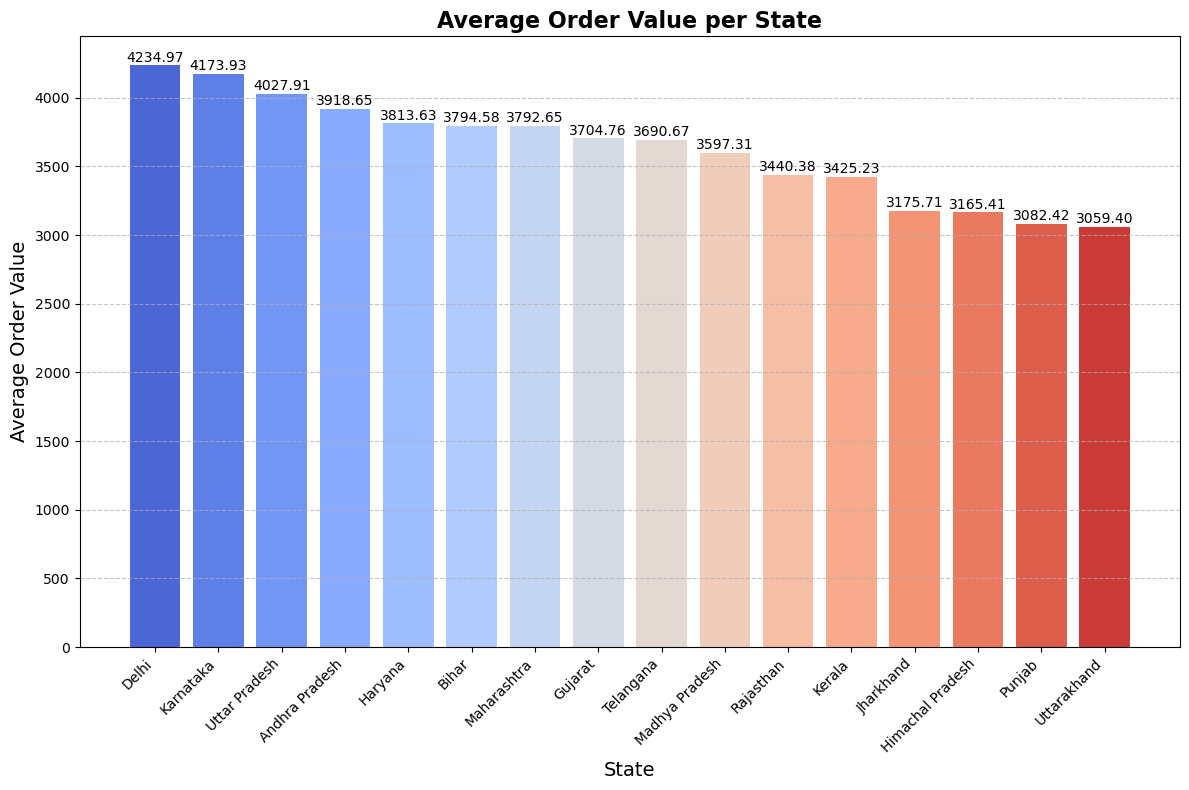

In [26]:
average_order_value = df.groupby('State').agg({'Amount': 'sum', 'Orders': 'sum'}).reset_index()
average_order_value['Average_Order_Value'] = average_order_value['Amount'] / average_order_value['Orders']
average_order_value = average_order_value[['State', 'Average_Order_Value']]
average_order_value = average_order_value.sort_values(by='Average_Order_Value', ascending=False)

# Plot
plt.figure(figsize=(12, 8))

# Using a color palette for better visuals
colors = sns.color_palette("coolwarm", len(average_order_value))
plt.bar(
    average_order_value['State'], 
    average_order_value['Average_Order_Value'], 
    color=colors
)

# Add titles and labels
plt.title("Average Order Value per State", fontsize=16, fontweight='bold')
plt.xlabel("State", fontsize=14)
plt.ylabel("Average Order Value", fontsize=14)

# Rotate x-axis ticks and adjust layout
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate values on top of the bars
for i, value in enumerate(average_order_value['Average_Order_Value']):
    plt.text(
        i, 
        value + 5,  # Offset value slightly above the bar
        f"{value:.2f}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

# Show plot
plt.show()

In [28]:
average_order_value

,State,Average_Order_Value
2,Delhi,4234.970602
7,Karnataka,4173.932099
14,Uttar Pradesh,4027.910681
0,Andhra Pradesh,3918.647972
4,Haryana,3813.626582
1,Bihar,3794.583176
10,Maharashtra,3792.645340
3,Gujarat,3704.759172
13,Telangana,3690.673077
9,Madhya Pradesh,3597.309947


#### Insights on average order value per state

1. **Highest Average Order Value**: Delhi has the highest average order value at approximately ₹4,235, indicating that customers in this state tend to spend more per order compared to other regions. This may suggest a higher purchasing power or a preference for premium products.

2. **Lowest Average Order Value**: Uttarakhand has the lowest average order value at around ₹3,059. This could indicate budget-conscious spending habits among consumers in this state or a lower average price point for products sold.

3. **Mid-range Values**: States like Andhra Pradesh and Karnataka show average order values close to ₹3,919 and ₹4,174, respectively. This suggests that these regions have a healthy level of consumer spending, which can be leveraged for targeted marketing strategies.

4. **Consistency Across States**: Most states have average order values ranging from ₹3,000 to ₹4,300, indicating a relatively consistent spending behavior among consumers across different regions, with minor fluctuations based on local market conditions.

5. **Opportunity for Growth**: The average order values in states like Himachal Pradesh and Jharkhand are lower (around ₹3,165 and ₹3,176). This presents an opportunity for businesses to explore strategies to increase the average transaction size, such as promotions or bundling offers.

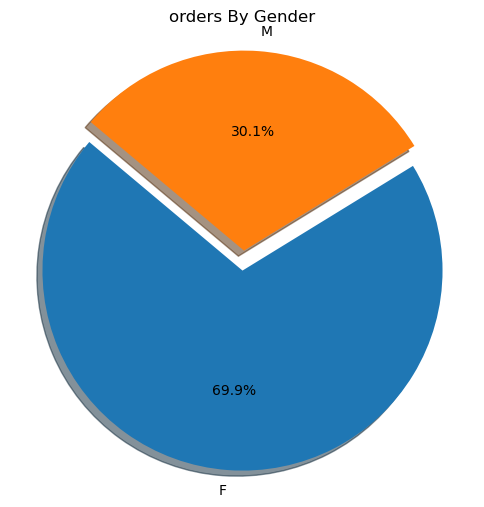

In [44]:
#order by Gender
orders_by_gender = df.groupby('Gender')['Orders'].sum().reset_index()

#piechart for orders by Gender

plt.figure(figsize = (6,6))
plt.pie(orders_by_gender['Orders'],labels = orders_by_gender["Gender"], autopct = "%1.1f%%",explode = (0.0,0.1),shadow = True, startangle = 140)
plt.title("orders By Gender")
plt.axis('equal')
plt.show()

#### Key insights
The data reveals that female customers (F) made significantly more orders (19,548) than male customers (M) with 8,433 orders. This indicates stronger purchasing engagement from females, suggesting that marketing strategies could be tailored to better target this demographic.


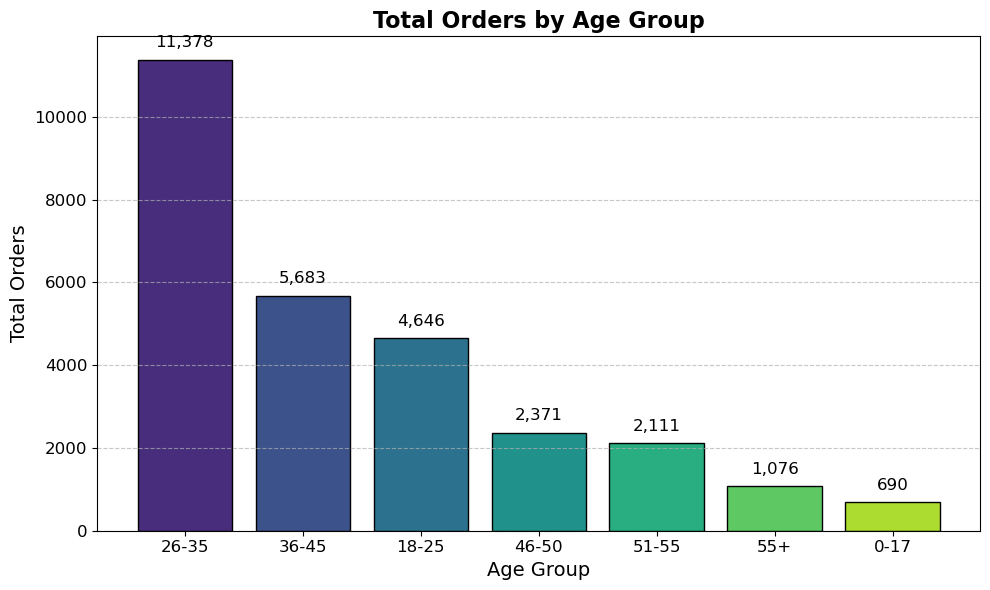

In [51]:
# orders by age Group

age_group_orders = df.groupby('Age Group')['Orders'].sum().reset_index()

# Sort by 'Orders' if needed (optional)
age_group_orders = age_group_orders.sort_values(by='Orders', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(age_group_orders))  # Use a vibrant palette

plt.bar(
    age_group_orders['Age Group'], 
    age_group_orders['Orders'], 
    color=colors, 
    edgecolor='black'
)

# Add labels, title, and grid
plt.title("Total Orders by Age Group", fontsize=16, fontweight='bold')
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Total Orders", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations on the bars
for i, value in enumerate(age_group_orders['Orders']):
    plt.text(
        i, 
        value + 0.02 * max(age_group_orders['Orders']),  # Adjust annotation position
        f"{value:,}", 
        ha='center', 
        va='bottom', 
        fontsize=12, 
        color='black'
    )

# Tight layout for a better fit
plt.tight_layout()
plt.show()

#### Insights from orders by age group

The orders distribution across age groups reveals that:

- The **26-35 age group** is the largest contributor to orders, indicating strong purchasing power and engagement.
- **Young adults (18-25)** also show notable activity, suggesting opportunities for trend-driven marketing.
- Orders from **middle-aged groups (36-45)** reflect a steady market presence, while older segments (46+) exhibit lower engagement, highlighting potential areas for targeted marketing efforts.
- Overall, focusing on the younger and middle-aged demographics could enhance sales and customer retention strategies.

In [55]:
# Sales by Product Category

df.groupby('Product_Category').agg({'Orders':'sum','Amount':'sum'}).reset_index()

,Product_Category,Orders,Amount
0,Auto,238,1935041.99
1,Beauty,1086,1959484.00
2,Books,245,1061478.00
3,Clothing & Apparel,6627,16484472.00
4,Decor,235,730360.00
5,Electronics & Gadgets,5208,15607657.00
6,Food,6110,33933883.50
7,Footwear & Shoes,2646,15575209.45
8,Furniture,889,5440051.99
9,Games & Toys,940,4331694.00


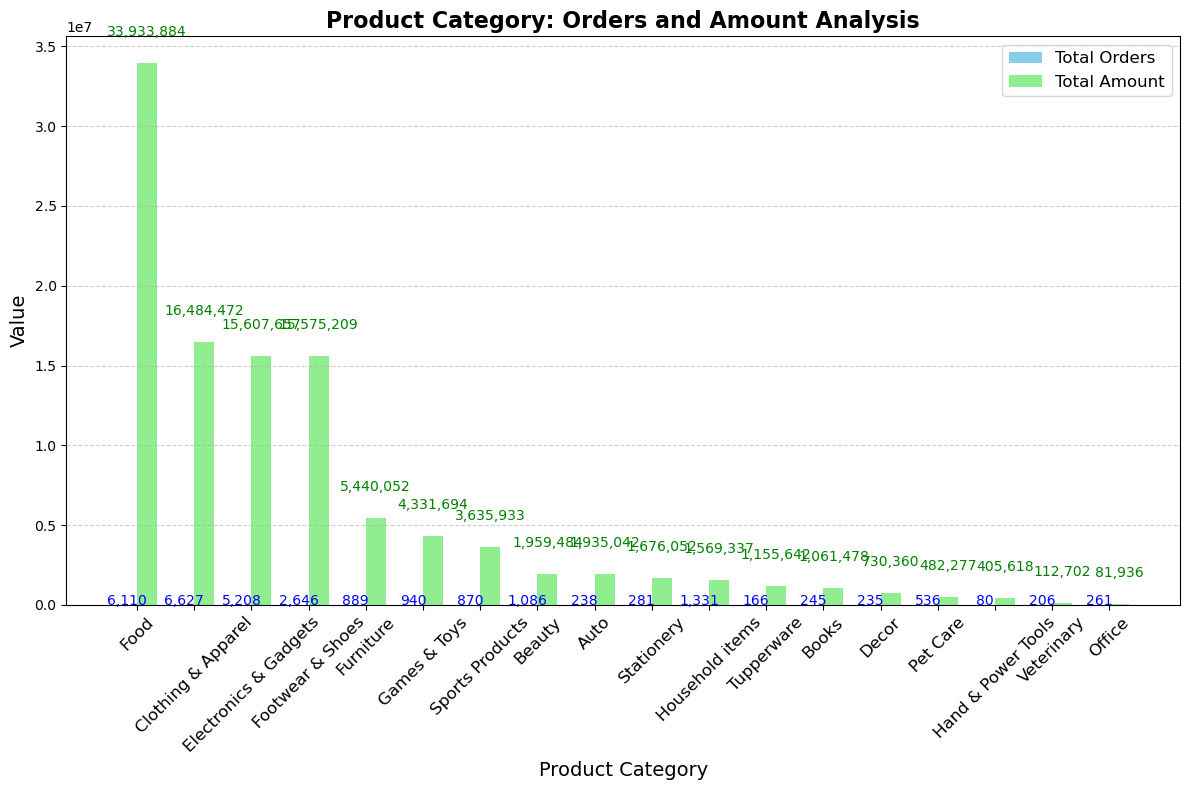

In [60]:

# Aggregate data by Product_Category
product_summary = df.groupby('Product_Category').agg({'Orders': 'sum', 'Amount': 'sum'}).reset_index()

# Sort values by Amount for better clarity (optional)
product_summary = product_summary.sort_values(by='Amount', ascending=False)

# Set up figure and axes
plt.figure(figsize=(12, 8))
bar_width = 0.35  # Width of each bar
index = np.arange(len(product_summary))  # X positions for bars

# Bar for Orders
plt.bar(
    index, 
    product_summary['Orders'], 
    bar_width, 
    color='skyblue', 
    label='Total Orders'
)

# Bar for Amount (placed next to Orders)
plt.bar(
    index + bar_width, 
    product_summary['Amount'], 
    bar_width, 
    color='lightgreen', 
    label='Total Amount'
)

# Adding labels and title
plt.title("Product Category: Orders and Amount Analysis", fontsize=16, fontweight='bold')
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(index + bar_width / 2, product_summary['Product_Category'], rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add annotations for better readability
for i in range(len(product_summary)):
    # Orders annotation
    plt.text(index[i], product_summary['Orders'].iloc[i] + 0.05 * max(product_summary['Orders']), 
             f"{product_summary['Orders'].iloc[i]:,}", ha='center', fontsize=10, color='blue')
    # Amount annotation
    plt.text(index[i] + bar_width, product_summary['Amount'].iloc[i] + 0.05 * max(product_summary['Amount']), 
             f"{product_summary['Amount'].iloc[i]:,.0f}", ha='center', fontsize=10, color='green')

# Add legend
plt.legend(fontsize=12)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()


#### Insights from sales by product category output

1. **Food** leads in both orders (6,110) and revenue (\$33.9M), showing strong consumer demand.
2. **Electronics & Gadgets** (5,226 orders, \$15.6M) and **Clothing & Apparel** (6,634 orders, \$16.5M) also perform well, indicating popular consumer interests.
3. **Footwear & Shoes** generates substantial sales (\$15.6M) with 2,646 orders.
4. **Beauty** (1,086 orders, \$1.96M) and **Sports Products** (870 orders, \$3.6M) show potential for growth.
5. Categories like **Auto** (239 orders, \$1.96M) and **Hand & Power Tools** (80 orders, \$405K) are underperforming and may need targeted marketing.

In [83]:
#Group by Age Group and Product category
df.groupby(["Age Group","Product_Category"])["Orders"].sum().unstack()

Product_Category,Auto,Beauty,Books,Clothing & Apparel,Decor,Electronics & Gadgets,Food,Footwear & Shoes,Furniture,Games & Toys,Hand & Power Tools,Household items,Office,Pet Care,Sports Products,Stationery,Tupperware,Veterinary
Age Group,,,,,,,,,,,,,,,,,,
0-17,8.0,21.0,3.0,169.0,2.0,142.0,185.0,16.0,29.0,29.0,NaN,40.0,11.0,4.0,23.0,7.0,NaN,1.0
18-25,50.0,203.0,44.0,1170.0,50.0,849.0,1169.0,104.0,171.0,114.0,20.0,294.0,55.0,80.0,162.0,35.0,43.0,33.0
26-35,98.0,424.0,103.0,2634.0,79.0,2083.0,2507.0,1067.0,343.0,394.0,28.0,679.0,98.0,230.0,332.0,138.0,40.0,101.0
36-45,43.0,222.0,52.0,1324.0,57.0,1022.0,1093.0,761.0,178.0,217.0,25.0,208.0,53.0,84.0,198.0,59.0,48.0,39.0
46-50,8.0,75.0,17.0,569.0,26.0,474.0,479.0,287.0,71.0,88.0,NaN,52.0,17.0,86.0,67.0,18.0,20.0,17.0
51-55,20.0,96.0,20.0,487.0,8.0,444.0,418.0,283.0,72.0,67.0,2.0,40.0,13.0,37.0,63.0,18.0,14.0,9.0
55+,11.0,45.0,6.0,274.0,13.0,194.0,259.0,128.0,25.0,31.0,5.0,18.0,14.0,15.0,25.0,6.0,1.0,6.0


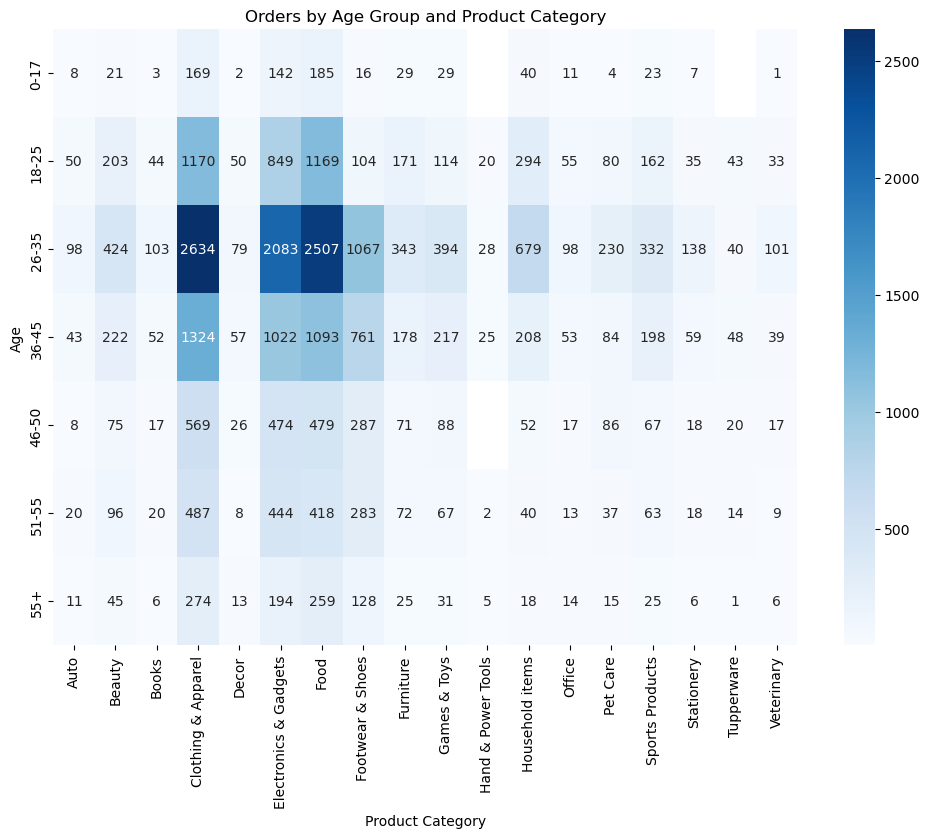

In [85]:
multi_group_orders = df.groupby(["Age Group","Product_Category"])["Orders"].sum().unstack()

#Heatmap for multivariate analysis
plt.figure(figsize=(12,8))
sns.heatmap(multi_group_orders, cmap = "Blues", annot = True , fmt = 'g')
plt.title('Orders by Age Group and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Age')
plt.show()

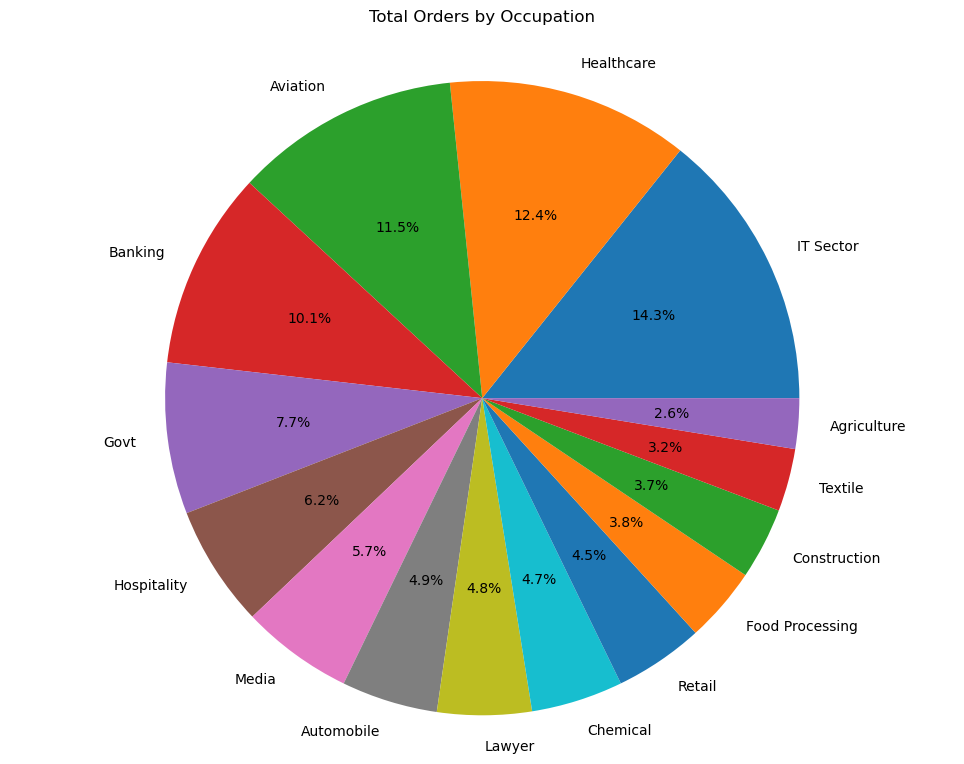

In [126]:
#Total Orders by occupation

occupation_orders = df.groupby('Occupation')['Orders'].sum().reset_index()
occupation_orders.columns = ["Occupation","Total_Orders"]

#sort Values by Total Orders

occupation_orders = occupation_orders.sort_values(by = 'Total_Orders',ascending = False)
#pie chart for orders by occumpation

plt.figure(figsize = (10,8))
plt.pie(occupation_orders["Total_Orders"],
        labels = occupation_orders["Occupation"],
        autopct = "%1.1f%%",
       )
plt.title("Total Orders by Occupation",pad = 20)
plt.axis('equal')
plt.tight_layout(pad = 2) # add some padding around the plpot
plt.show()

The analysis of total orders by occupation reveals the following insights:

- **IT Sector** leads with the highest number of orders (3,997), indicating a strong consumer engagement in technology-related products or services.
- **Healthcare** and **Aviation** follow closely, with orders of 3,455 and 3,215, respectively, highlighting significant demand in these critical sectors.
- Other notable occupations include **Banking** (2,817), **Government** (2,155), and **Hospitality** (1,739), each demonstrating considerable order volumes.
- Occupations such as **Retail** (1,270) and **Construction** (1,025) also contribute to the overall order count, suggesting diverse consumer interests across various fields.


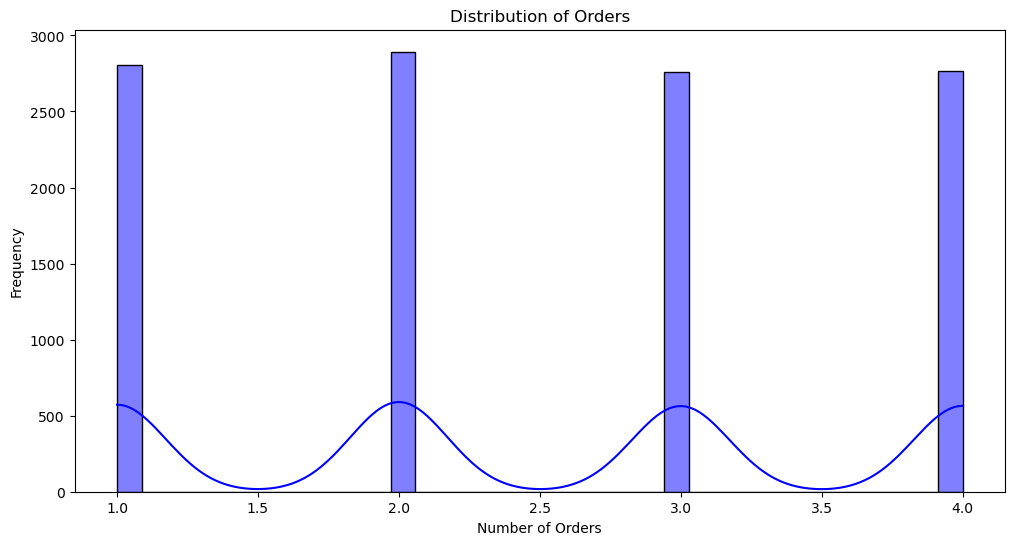

In [135]:
#order distribution

plt.figure(figsize = (12,6))
sns.histplot(df['Orders'],kde = True,color = 'blue')
plt.title("Distribution of Orders")
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

### Insights from order count data

1. **Popular Order Size**: The most common order size consists of 2 orders, accounting for 2,893 instances. This suggests that many customers prefer ordering multiple items in a single transaction.
2. **Balanced Distribution**: The counts for orders of 1 (2,808), 3 (2,765), and 4 (2,773) indicate a relatively balanced distribution of order sizes, reflecting diverse customer preferences.
3. **Focus on Order Optimization**: Given that most orders fall between 1 to 4 items, strategies to encourage larger order sizes, such as bundle offers or discounts on higher quantities, could effectively increase sales.


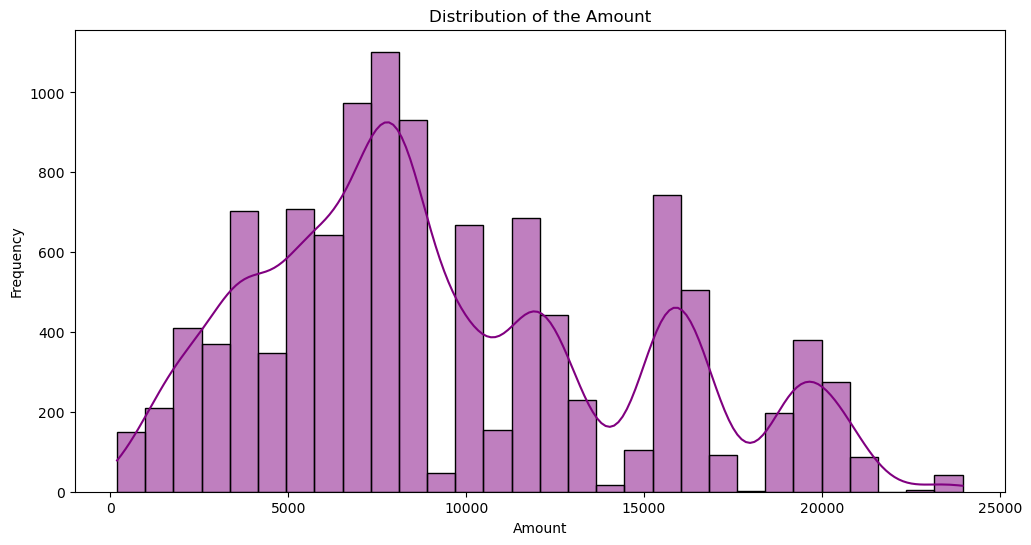

In [139]:
#Amount Distribution
plt.figure(figsize = (12,6))
sns.histplot(df["Amount"],kde = True,bins = 30,color = 'purple')
plt.title("Distribution of the Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

In [150]:
#correlation heatmap
numeric_columns = [col for col in df.columns if df[col].dtypes != "O"]
numeric_columns.remove('User_ID')
numeric_columns

['Age', 'Marital_Status', 'Orders', 'Amount']

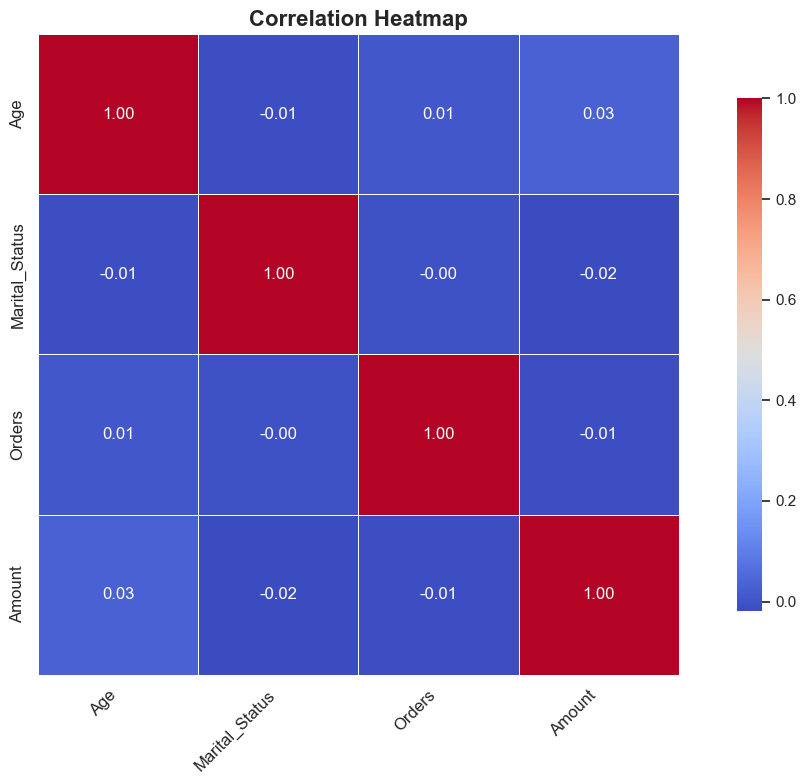

In [154]:

plt.figure(figsize=(12, 8))
sns.set(style="white")

# Generate heatmap
heatmap = sns.heatmap(
    df[numeric_columns].corr(),  # Correlation matrix
    annot=True,                 # Show annotations
    fmt=".2f",                  # Format annotations to 2 decimal places
    cmap='coolwarm',            # Colormap for positive/negative correlations
    cbar_kws={"shrink": 0.8},   # Shrink the color bar for better proportions
    linewidths=0.5,             # Add grid lines between cells
    square=True                 # Enforce square cells for aesthetics
)

# Add a title with styling
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Adjust tick labels for clarity
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)

# Tight layout for better spacing
plt.tight_layout()

# Show the heatmap
plt.show()


Key insights
The correlation heatmap indicates weak relationships among Age, Marital Status, Orders, and Amount, with all coefficients near zero. Age shows a slight positive correlation (0.031) with Amount, suggesting older customers may spend marginally more. Overall, these variables do not significantly influence each other, indicating that other factors may drive sales and order frequency.

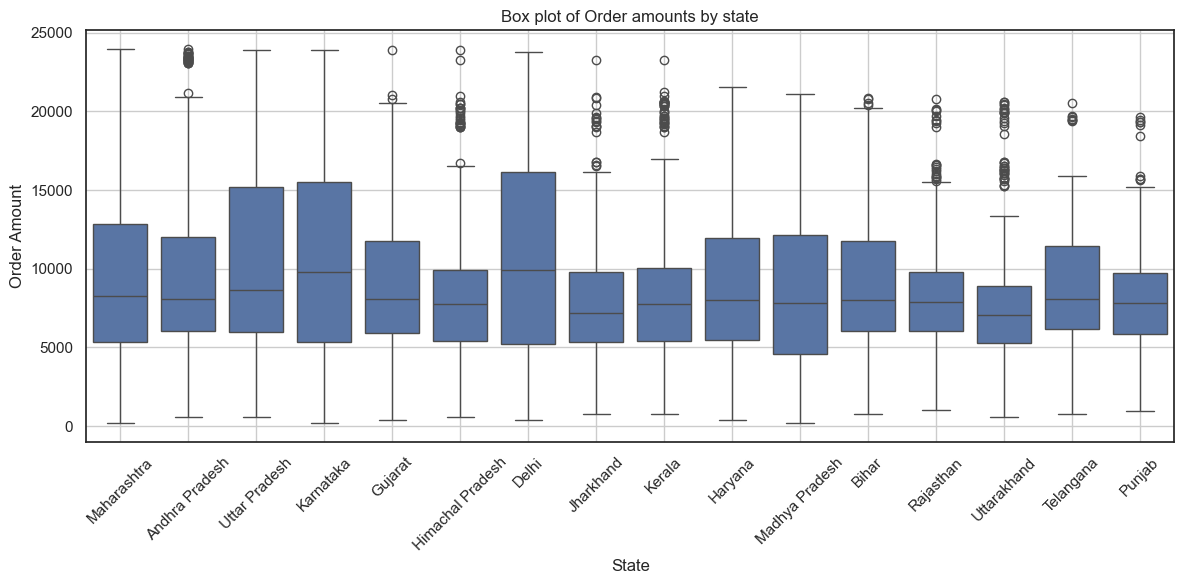

In [162]:
# Box plot of order amounts by state

plt.figure(figsize = (12,6))
sns.boxplot(x = "State", y = "Amount", data =df)
plt.title('Box plot of Order amounts by state')
plt.xlabel('State')
plt.ylabel('Order Amount')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.grid()
plt.show()

### Insights

The box plot reveals significant variations in order amounts across different states:

- **Maharashtra and Karnataka** show higher median order amounts, indicating potentially stronger purchasing power or higher-value orders in these states.
- **Uttar Pradesh and Gujarat** also have high maximum order values, though their median values are lower than Maharashtra.
- **States like Jharkhand, Kerala, and Punjab** show relatively lower order amounts overall, with smaller spreads, indicating more consistent but lower-value purchases.
- Several states have **outliers**, suggesting occasional high-value orders, which could indicate specific segments of affluent customers or bulk orders in those regions.

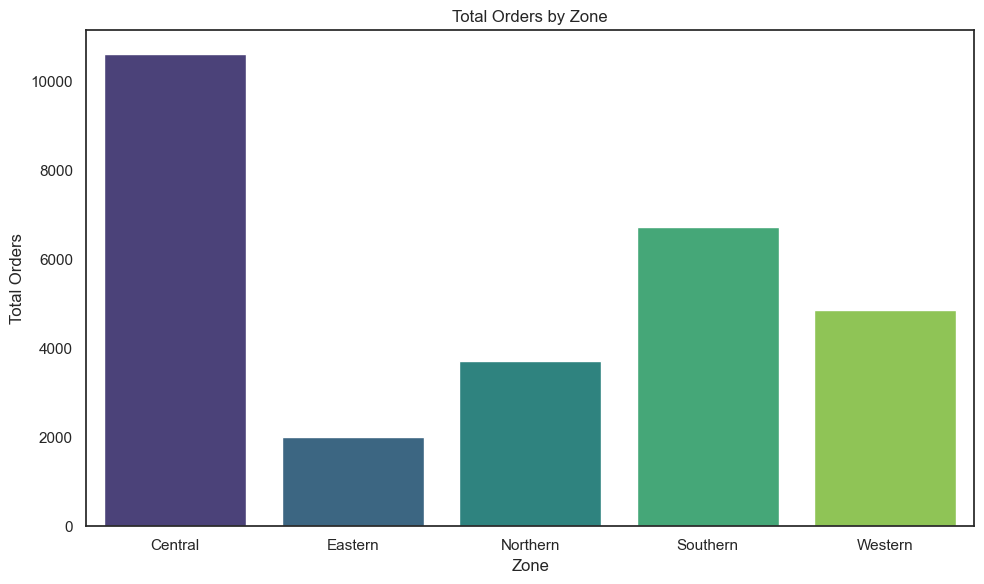

In [167]:
#Total Orders by Zone

zone_orders = df.groupby('Zone')['Orders'].sum().reset_index()
zone_orders.columns = ['Zone', 'Total_Orders']

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=zone_orders, x='Zone', y='Total_Orders', palette='viridis')

# Update layout for better aesthetics
plt.title("Total Orders by Zone")
plt.xlabel('Zone')
plt.ylabel('Total Orders')
plt.tight_layout()

# Show the figure
plt.show()

#### Key insights

1. **Central Zone Dominance**: The Central zone leads with **10,623** orders, indicating strong engagement and spending during Diwali.

2. **Low Engagement in Eastern Zone**: The Eastern zone's **2,015** orders suggest potential cultural differences or market challenges.

3. **Diverse Regional Practices**: Northern (**3,727**) and Southern (**6,740**) zones show moderate participation, indicating varied Diwali observances.

4. **Logistics Focus**: Concentrated orders in the Central zone highlight the need for efficient supply chain management to meet high demand.

5. **Tailored Marketing**: Localized marketing strategies can enhance appeal and drive sales by aligning with regional customs and preferences.

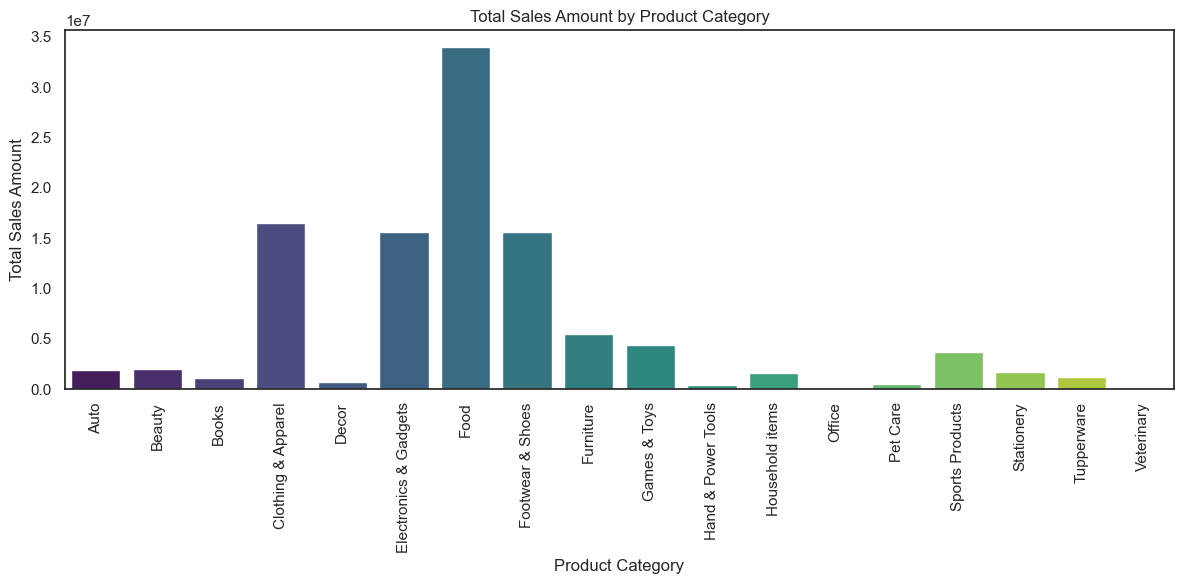

In [172]:
#Total sales amount by product category

category_sales = df.groupby('Product_Category')['Amount'].sum().reset_index()
category_sales.columns = ['Product_Category', 'Total_Sales']

# Bar chart for total sales by product category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='Product_Category', y='Total_Sales', palette='viridis')
plt.title('Total Sales Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Key insights from total sales by product category during Diwali

1. **Top Category - Food**: Leads with ₹33,933,883.50, reflecting high demand for festive treats.
2. **Strong Electronics Sales**: Generated ₹15,643,846, showing popularity for tech gifts.
3. **Clothing & Apparel**: Achieved ₹16,495,019 in sales, indicating a trend towards new attire for celebrations.
4. **Footwear Demand**: Totaling ₹15,575,209.45, suggesting shoppers prioritize stylish footwear.
5. **Underperforming Categories**: Office supplies (₹81,936) and veterinary products (₹112,702) show low interest, signaling a need for revised marketing.